#### Phân tích chuỗi dữ liệu nhiệt độ của quá trình hoá học

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acovf, acf

In [3]:
# Tải dữ liệu nhiệt độ
temp = pd.read_excel('../Data/chemical process.xlsx')
temp.head()

,Temperature readings
0,26.6
1,27.0
2,27.1
3,27.1
4,27.1


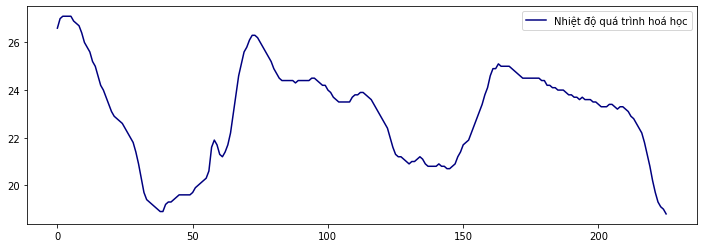

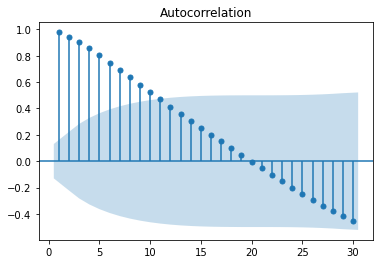

In [4]:
# Biểu đồ dữ liệu nhiệt độ và ACF
plt.subplots(figsize=(12,4))
plt.plot(temp, color="navy", label = "Nhiệt độ quá trình hoá học")
plt.legend()

fig = plot_acf(temp, lags = 30, zero = False)

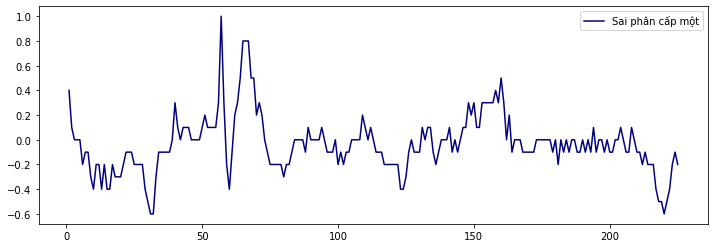

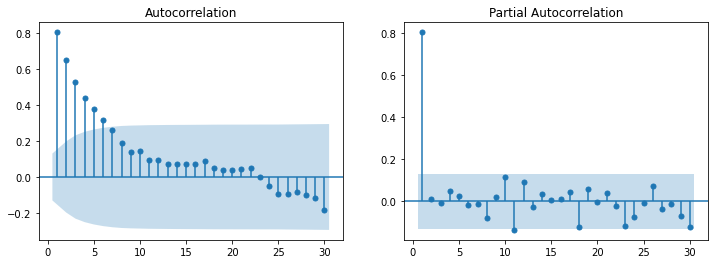

In [5]:
# Lấy sai phân chuỗi
tmp_diff = temp.diff().dropna()

plt.subplots(figsize=(12,4))
plt.plot(tmp_diff, color="navy", label = "Sai phân cấp một")
plt.legend()

fig, ax = plt.subplots(1,2, figsize=(12,4))
fig = plot_acf(tmp_diff, lags = 30, zero = False, ax = ax[0])
fig = plot_pacf(tmp_diff, lags = 30, zero = False, method = 'ywm', ax = ax[1])

In [6]:
# Ước lượng mô hình ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(temp, order=(1,1,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Temperature readings   No. Observations:                  226
Model:                   ARIMA(1, 1, 0)   Log Likelihood                 131.668
Date:                  Thu, 14 Dec 2023   AIC                           -259.336
Time:                          22:59:32   BIC                           -252.504
Sample:                               0   HQIC                          -256.579
                                  - 226                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8202      0.024     34.658      0.000       0.774       0.867
sigma2         0.0181      0.001     19.381      0.000       0.016       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               233.10
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

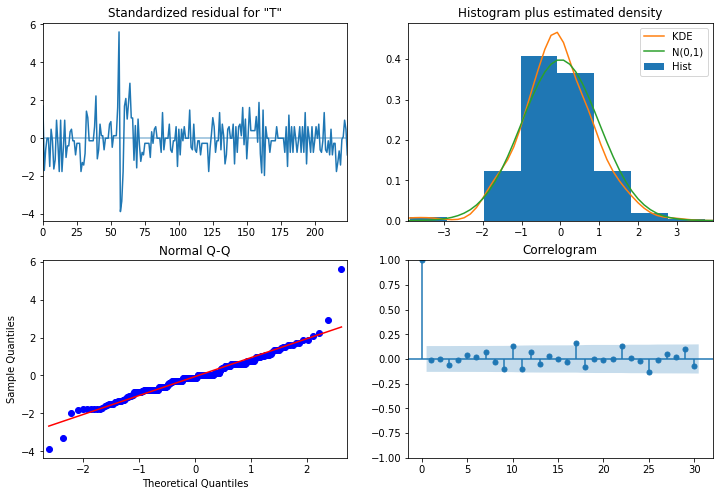

In [7]:
# Đánh giá phần dư
fig = plt.figure(figsize=(12, 8))
fig = result.plot_diagnostics(fig=fig, lags=30)

In [8]:
# Đánh giá mô hình bằng thống kê Qstat
residuals = result.resid[1:] # Bỏ giá trị đầu do d = 1
r, q, p = acf(residuals, nlags=20, qstat=True)
pd.DataFrame(np.array([np.arange(1, 21), r[1:], q, p]).T,
                 columns=["lag", "acf", "Qstat", "pvalue"]).set_index('lag')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


,acf,Qstat,pvalue
lag,,,
1.0,-0.017916,0.073185,0.786755
2.0,-0.003583,0.076125,0.962653
3.0,-0.055429,0.782967,0.853537
4.0,-0.011457,0.813302,0.936656
5.0,0.034565,1.090671,0.954926
6.0,0.024653,1.232418,0.975253
7.0,0.070463,2.395660,0.934747
8.0,-0.041487,2.800777,0.946231
9.0,-0.101895,5.255841,0.811460
